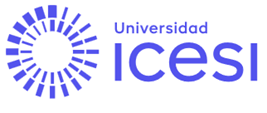

FACULTAD DE INGENIERIAS, DISEÑO Y CIENCIAS APLICADAS.

DEPARTAMENTO DE CIENCIAS FISICAS Y APLICADAS.

**Profesor:** Daniel Osorio

## Analisis Exploratorio con R y Python

Las autoridades de salud de la ciudad están preocupadas porque en cierta zona de esta se viene presentado un problema de salud en niños recién nacidos y consideran que el problema se debe a los malos hábitos de vida de las madres. Desarrollan un estudio a todas las madres que durante un periodo de seis meses dieron a luz un bebe en dicha zona. En este estudio se evaluaron aspectos de la historia clínica y sus hábitos de vida. La información de cada una de las madres y su hijo quedó registrada en la siguiente tabla.

**Id:** número identificador de la madre.

**Bajo_peso:** indica si él recién nacido tuvo bajo paso al momento de nacer (1=Si; 0=No).

**Edad:** edad de la madre en años cumplidos.

**Peso_madre:** peso de la madre en libras.

**Raza:** raza de la madre.

**Fumar:** antecedente de consumo de cigarrillo de la madre (1=Si; 0=No).

**TPP:** antecedente materno del número partos prematuros antes de este embarazo.

**Ant_HTA:** antecedente materno de hipertensión arterial (1=Si; 0=No).

**Irrit_uterina:** antecedente en este embarazo de irritabilidad uterina (1=Si; 0=No).

**Visitas_md:** número de visitas de control médico en este embarazo.

**peso_nacer:** peso real al nacer en gramos del recién nacido


## Población de estudio:

Todas las madres que tuvieron un bebé en esta zona de la ciudad, durante los seis meses de estudio



## Librerias o paquetes

In [4]:
#                        Python                       #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## Carga de Datos

Diferentes formas de cargar datos, diferentes formatos

In [5]:
#                        Python                       #
# Cargar los datos
datos_p = pd.read_csv('https://raw.githubusercontent.com/profedaniel86/Clase-Bioestad-stica/refs/heads/main/Practica%20R/Practica.csv', sep=';')

## Exploremos los datos

¿Se trata de una muestra o una población?

Podemos empezar haciendonos una idea de como vienen los datos, las variables que tienen

In [8]:
#                        Python                       #
datos_p.head()

,id,Bajo_peso,Edad,Peso_madre,Raza,Fumar,TPP,Ant_HTA,Irrit_uterina,Visitas_md,peso_nacer
0,1,0,25,120,white,0,0,0,0,2,3983
1,2,0,25,241,black,0,0,1,0,0,3790
2,3,0,32,132,white,0,0,0,0,4,3080
3,4,0,21,124,other,0,0,0,0,0,2622
4,5,1,24,132,other,0,0,1,0,0,1729


¿cuáles variables son cualitativas y cuales son cuantitativas?

In [10]:
#                        Python                       #
datos_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             189 non-null    int64 
 1   Bajo_peso      189 non-null    int64 
 2   Edad           189 non-null    int64 
 3   Peso_madre     189 non-null    int64 
 4   Raza           189 non-null    object
 5   Fumar          189 non-null    int64 
 6   TPP            189 non-null    int64 
 7   Ant_HTA        189 non-null    int64 
 8   Irrit_uterina  189 non-null    int64 
 9   Visitas_md     189 non-null    int64 
 10  peso_nacer     189 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 16.4+ KB


Empecemos a analizar frecuencias

la distribución de frecuencias para el bajo peso al nacer. ¿Existe realmente el problema?

In [12]:
#                        Python                       #

print(datos_p['Bajo_peso'].value_counts())
print(datos_p['Bajo_peso'].value_counts(1))

Bajo_peso
0    130
1     59
Name: count, dtype: int64
Bajo_peso
0    0.687831
1    0.312169
Name: proportion, dtype: float64


En los datos, observamos que un 69% de los niños nacieron con peso normal, mientras que un 31% con bajo peso, lo que representa un valor alto en el contexto del problema

Miremos una tabla completa analizando solo la variable raza

In [6]:
#                        Python                       #

# Frecuencias acumuladas para la columna 'Raza'
frec_absoluta_acum = datos_p['Raza'].value_counts().sort_index().cumsum()
frec_relativa_acum = datos_p['Raza'].value_counts(normalize=True).sort_index().cumsum()

# Combinar todo en una tabla
tabla_frecuencias = pd.DataFrame({
    'Frecuencia_Absoluta': datos_p['Raza'].value_counts(),
    'Frecuencia_Relativa': datos_p['Raza'].value_counts(normalize=True),
    'Frecuencia_Absoluta_Acum': frec_absoluta_acum,
    'Frecuencia_Relativa_Acum': frec_relativa_acum
})

print(tabla_frecuencias)

       Frecuencia_Absoluta  Frecuencia_Relativa  Frecuencia_Absoluta_Acum  \
Raza                                                                        
black                   26             0.137566                        26   
other                   67             0.354497                        93   
white                   96             0.507937                       189   

       Frecuencia_Relativa_Acum  
Raza                             
black                  0.137566  
other                  0.492063  
white                  1.000000  


C:\Users\1130590314\AppData\Local\Temp\ipykernel_8328\1349372827.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Raza', data=datos_p, palette='viridis')


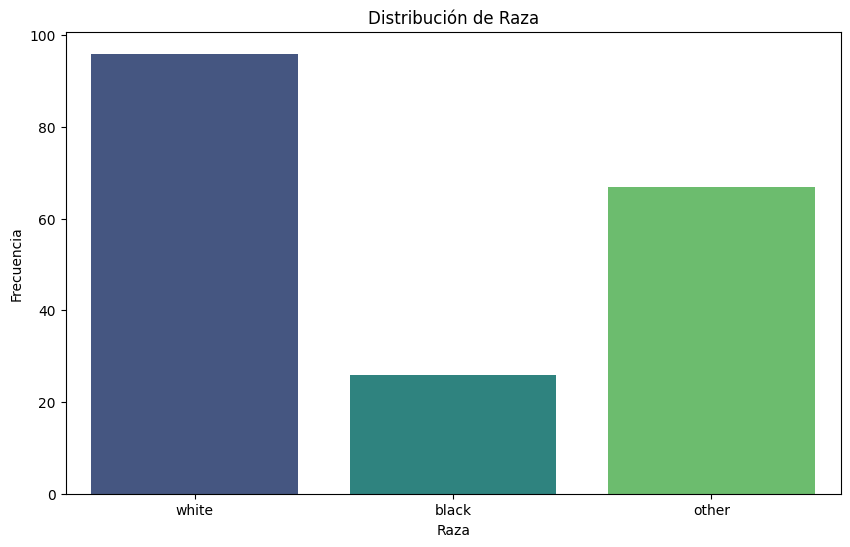

In [7]:
#                        Python                       #

# Diagrama de barras para 'Raza'
plt.figure(figsize=(10, 6))
sns.countplot(x='Raza', data=datos_p, palette='viridis')
plt.title("Distribución de Raza")
plt.xlabel("Raza")
plt.ylabel("Frecuencia")
plt.show()

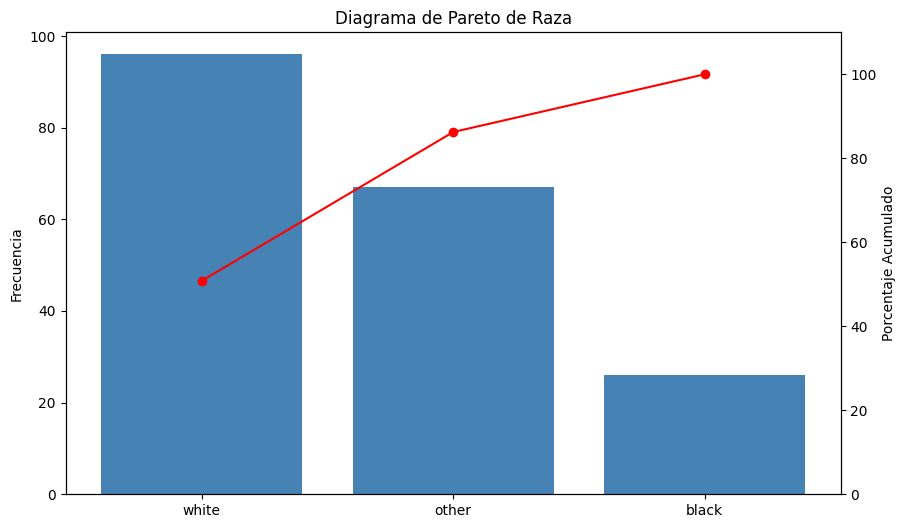

In [ ]:
#                        Python                       #

# Calcular frecuencias y ordenar
frecuencia_raza = datos_p['Raza'].value_counts().sort_values(ascending=False)
frecuencia_raza = frecuencia_raza.reset_index()
frecuencia_raza.columns = ['Raza', 'Frecuencia']
frecuencia_raza['Porcentaje'] = frecuencia_raza['Frecuencia'].cumsum() / frecuencia_raza['Frecuencia'].sum() * 100

# Diagrama de Pareto
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(frecuencia_raza['Raza'], frecuencia_raza['Frecuencia'], color='steelblue')
ax2 = ax.twinx()
ax2.plot(frecuencia_raza['Raza'], frecuencia_raza['Porcentaje'], color='red', marker='o')
ax2.set_ylim([0, 110])
plt.title("Diagrama de Pareto de Raza")
plt.xlabel("Raza")
ax.set_ylabel("Frecuencia")
ax2.set_ylabel("Porcentaje Acumulado")
plt.show()

distribución de frecuencias de la raza de la madre con el bajo peso. ¿Existe alguna relación?

In [9]:
#                        Python                       #

# Tabla cruzada de frecuencias absolutas
tabla_cruzada = pd.crosstab(datos_p['Raza'], datos_p['Bajo_peso'])
print(tabla_cruzada)
print("")
frec_relativa_total = (tabla_cruzada / len(datos_p)) * 100

print(frec_relativa_total)
print("")
frec_relativa_filas = pd.crosstab(datos_p['Raza'], datos_p['Bajo_peso'], normalize='index') * 100

print(frec_relativa_filas)

Bajo_peso   0   1
Raza             
black      15  11
other      42  25
white      73  23

Bajo_peso          0          1
Raza                           
black       7.936508   5.820106
other      22.222222  13.227513
white      38.624339  12.169312

Bajo_peso          0          1
Raza                           
black      57.692308  42.307692
other      62.686567  37.313433
white      76.041667  23.958333


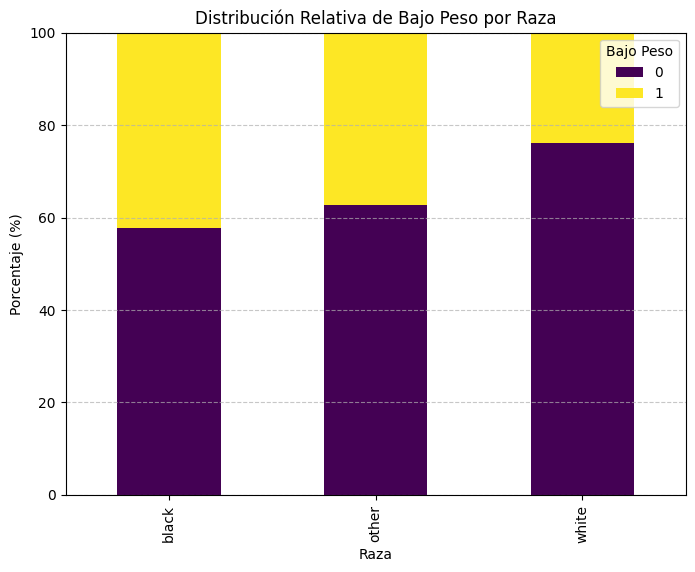

In [10]:
#                        Python                       #

# Tabla de frecuencia relativa por filas (normalizada)
frec_relativa_filas = pd.crosstab(datos_p['Raza'], datos_p['Bajo_peso'], normalize='index') * 100

# Gráfico de barras apiladas al 100%
frec_relativa_filas.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8,6))

plt.title("Distribución Relativa de Bajo Peso por Raza")
plt.xlabel("Raza")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Bajo Peso")
plt.ylim(0, 100)  # Asegura que el eje y vaya de 0 a 100%
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [11]:
#                        Python                       #

# Media, mediana y desviación estándar de 'peso_nacer'
media_peso = datos_p['peso_nacer'].mean()
mediana_peso = datos_p['peso_nacer'].median()
desviacion_peso = datos_p['peso_nacer'].std()

print(f"Media: {media_peso}")
print(f"Mediana: {mediana_peso}")
print(f"Desviación estándar: {desviacion_peso}")

Media: 2944.285714285714
Mediana: 2977.0
Desviación estándar: 729.0160177275554


estadísticas descriptivas del peso al nacer por cada raza de la madre

In [32]:
#                        Python                       #

agrupado_raza = datos_p.groupby('Raza')['peso_nacer'].mean().reset_index()

# Renombrar la columna resultante
agrupado_raza = agrupado_raza.rename(columns={'peso_nacer': 'peso_promedio'})

# Mostrar el resultado
print(agrupado_raza)

agrupado_raza = datos_p.groupby('Raza')['peso_nacer'].agg(
    peso_min = 'min',
    peso_promedio='mean',
    mediana='median',
    peso_max = 'max',
    rango=lambda x: x.max() - x.min(),   # Calcula el rango
    desviacion_estandar='std',           # Desviación estándar
    desviacion_estandar_p=lambda x: x.std(ddof=0),
    coeficiente_variacion=lambda x: (x.std() / x.mean()) * 100  # Coeficiente de variación
).reset_index()

# Mostrar el resultado
print(agrupado_raza)

    Raza  peso_promedio
0  black    2719.692308
1  other    2804.014925
2  white    3103.010417
    Raza  peso_min  peso_promedio  mediana  peso_max  rango  \
0  black      1135    2719.692308   2849.0      3860   2725   
1  other       709    2804.014925   2835.0      4054   3345   
2  white      1021    3103.010417   3076.0      4990   3969   

   desviacion_estandar  desviacion_estandar_p  coeficiente_variacion  
0           638.683882             626.281073              23.483682  
1           721.301149             715.898069              25.723870  
2           727.872437             724.071510              23.456977  


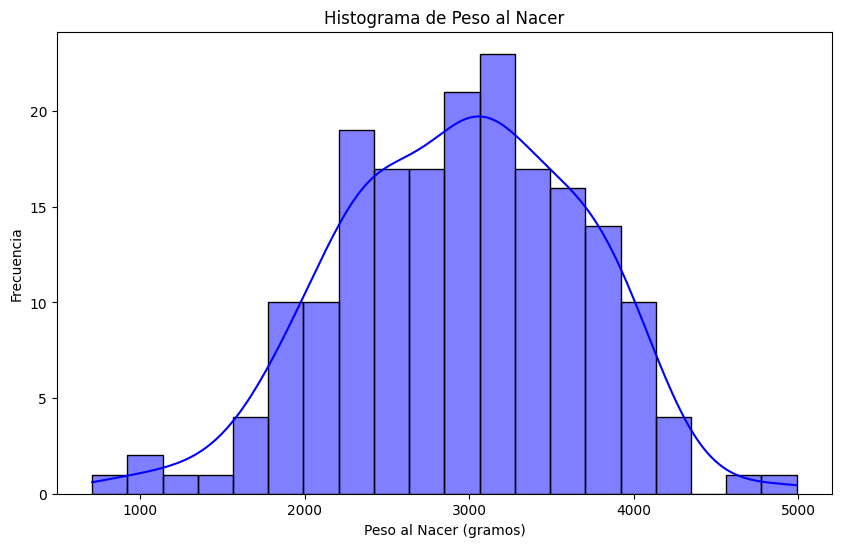

In [ ]:
#                        Python                       #

# Histograma de 'peso_nacer'
plt.figure(figsize=(10, 6))
sns.histplot(datos_p['peso_nacer'], bins=20, kde=True, color='blue')
plt.title("Histograma de Peso al Nacer")
plt.xlabel("Peso al Nacer (gramos)")
plt.ylabel("Frecuencia")
plt.show()

<ipython-input-62-f9090d5821f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Raza', y='peso_nacer', data=datos_p, palette='Set2')


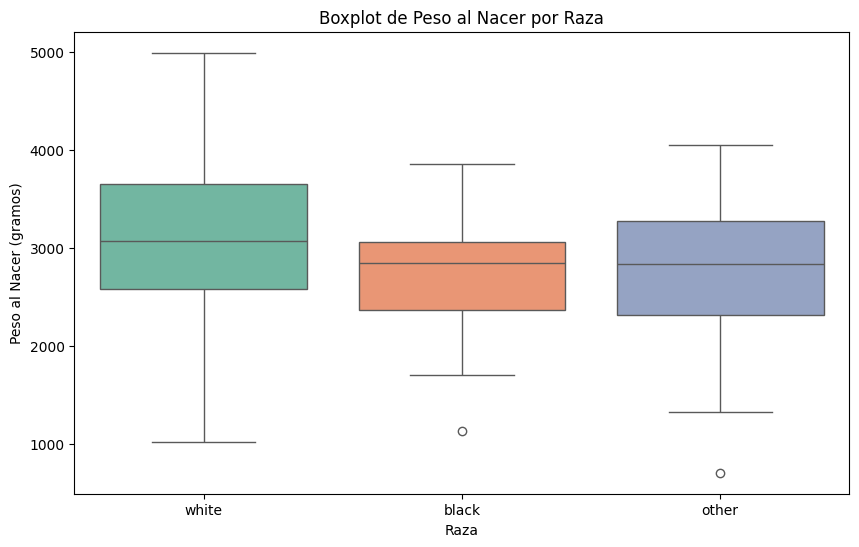

In [ ]:
#                        Python                       #

# Boxplot de 'peso_nacer' por 'Raza'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Raza', y='peso_nacer', data=datos_p, palette='Set2')
plt.title("Boxplot de Peso al Nacer por Raza")
plt.xlabel("Raza")
plt.ylabel("Peso al Nacer (gramos)")
plt.show()

- Construya la distribución de frecuencias de hábito de fumar por cada bajo peso. ¿Es un indicador del problema?
- Construya la distribución de frecuencias de Hipertensión por cada bajo peso. ¿Es un indicador del problema?
- Calcular las estadísticas descriptivas del número de visitas al médico por cada bajo peso. Compare los resultados.
- Calcular las estadísticas descriptivas del peso de la madre por cada bajo peso. Compare los resultados.
- Construya un gráfico de caja y bigotes para el peso de la madre por cada bajo peso.
- Calcular las estadísticas descriptivas del peso al nacer por hábito de fumar de la madre. Compare los resultados.
- Desarrolle una conclusión general del estudio con base en los resultados obtenidos.
